# Notebook to analyze output of Grid code for SU(4)
Author: Venkitesh Ayyar (vayyar@bu.edu) \
Dec 2, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [3]:
# %matplotlib widget

In [4]:
%matplotlib notebook

In [5]:
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node'

fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node'

### Get Plaquette value

In [6]:
cmd="grep 'Plaq' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Plaq' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node
Grid : Message : 655.940409 s : Plaquette: [ 1 ] 0.6895348576071966


In [7]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    itr=int(i.split('[ ')[-1].split(' ]')[0])
    val=np.float64(i.split(' ')[-1])
    time=np.float64(i.split(': ')[2].split(' s')[0])
    dict1={'iter':itr, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [8]:
df

,iter,val,time
0,1,0.689535,655.940409
1,2,0.658623,1302.721255
2,3,0.636843,1950.141048
3,4,0.620367,2595.830295
4,5,0.609019,3244.351297
5,6,0.601501,3892.657119
6,7,0.595258,4539.391024
7,8,0.590866,5187.226577
8,9,0.587257,5834.283780
9,10,0.584669,6480.852693


<IPython.core.display.Javascript object>


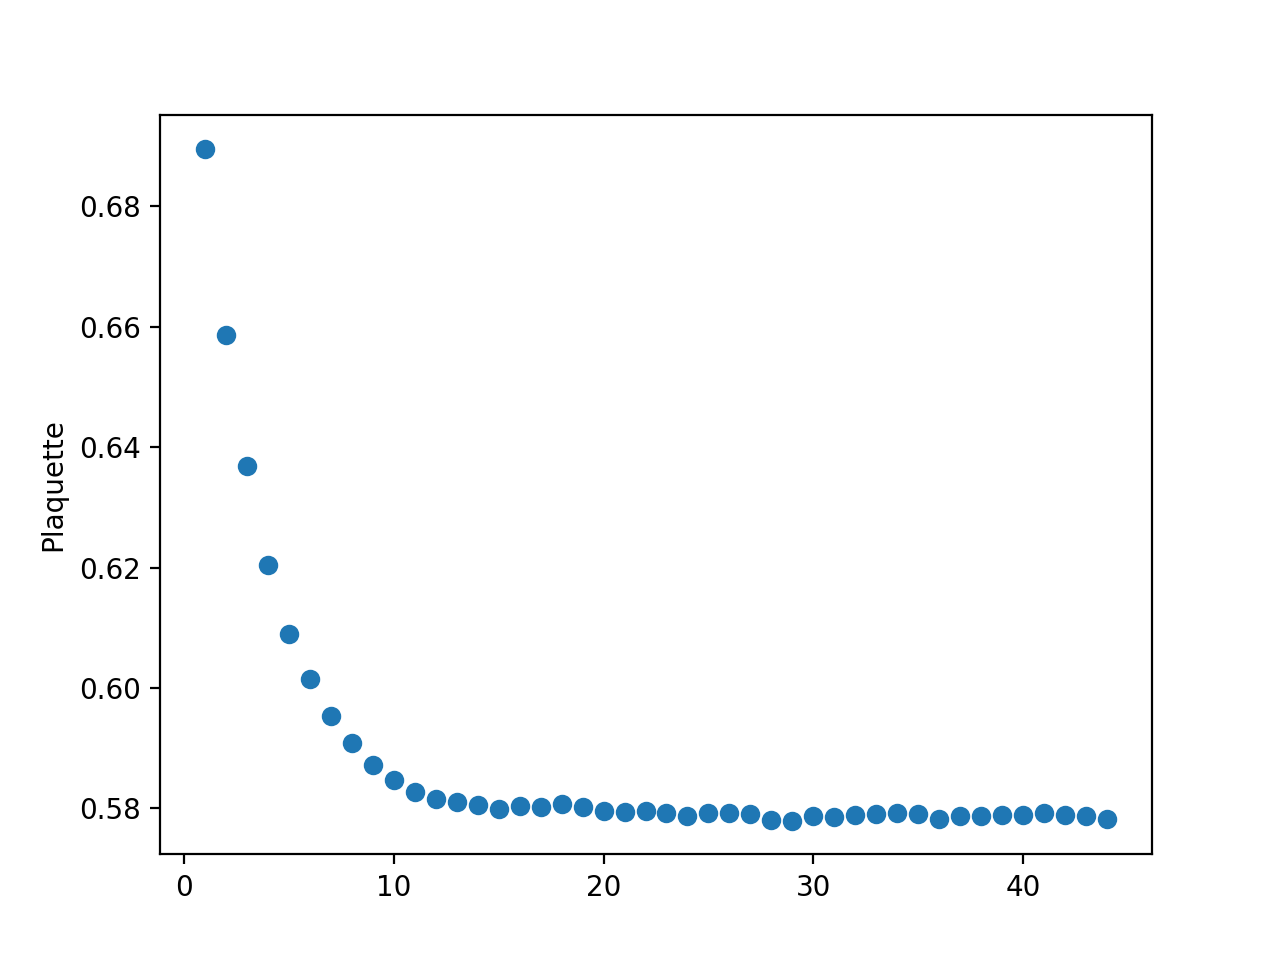

Text(0, 0.5, 'Plaquette')

In [9]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
# plt.show()

### Get acceptance rate

In [15]:
cmd="grep 'Metropolis_test' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Metropolis_test' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node
Grid : Message : 7129.730321 s : Metropolis_test -- ACCEPTED


In [16]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    val=1 if (i.split(' ')[-1]=='ACCEPTED') else 0 # Accept =1 , Reject = 0
    time=np.float64(i.split(': ')[2].split(' s')[0]) 
    dict1={'iter':count, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [17]:
df

,iter,val,time
0,0,1,7129.730321
1,1,1,7777.201164
2,2,1,8424.248324
3,3,1,9071.661257
4,4,1,9719.514959
5,5,1,10369.166095
6,6,1,11017.828850
7,7,1,11664.217121
8,8,1,12312.263320
9,9,1,12960.247427


<IPython.core.display.Javascript object>


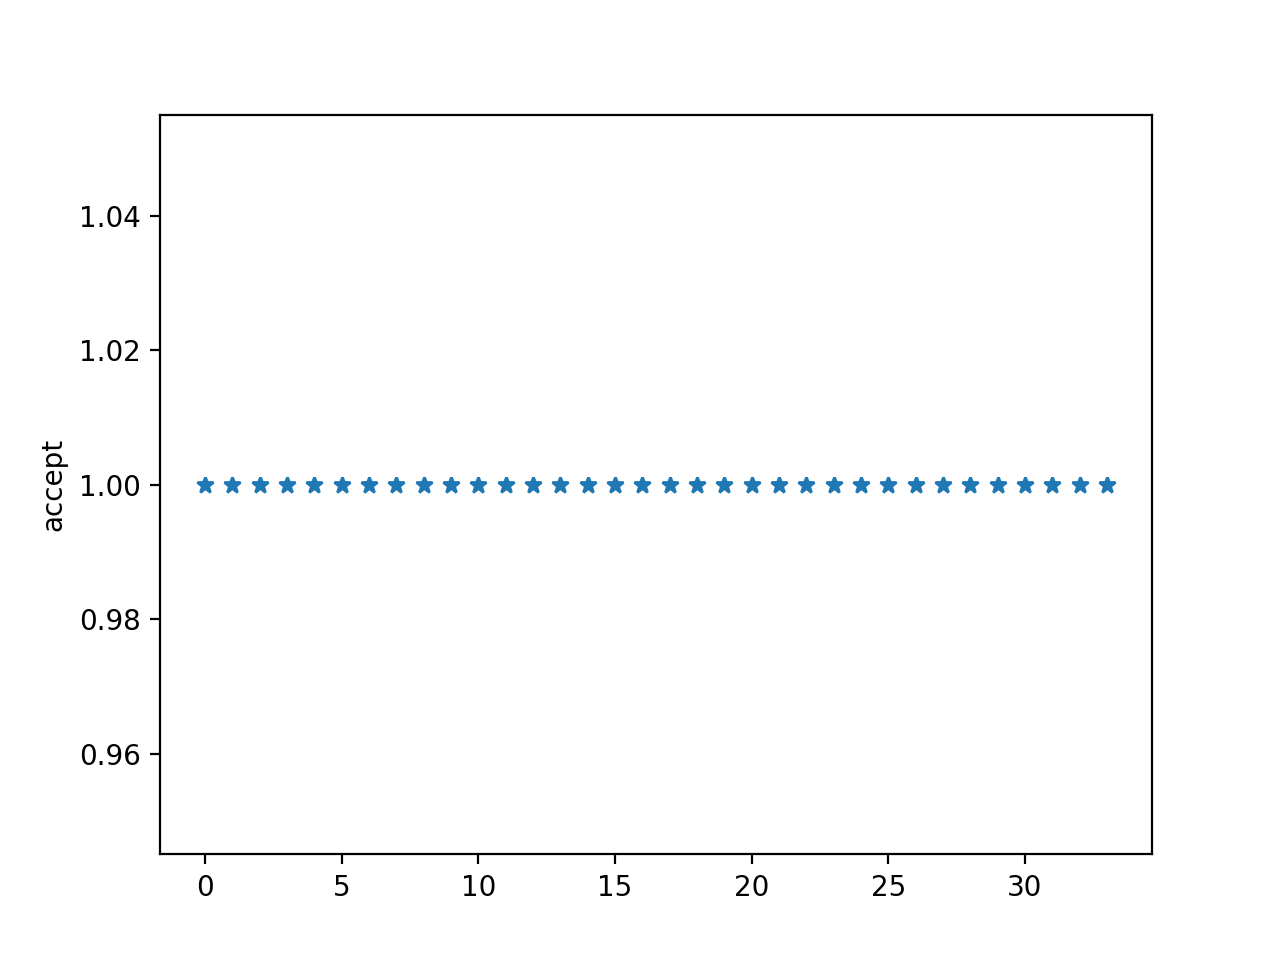

In [18]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [19]:
# Print Acceptance ratio
ct=df['val'].value_counts()
print(ct)

Act=ct[1]
Rft=ct[0]
print(Act* 100 /(Act+Rft),'%')

1    34
Name: val, dtype: int64


KeyError: 0